<h2>Online Shoppers Purchasing Intention Dataset</h2>
<h3>Dataset Information</h3>
The dataset consists of feature vectors belonging to 12,330 sessions. The dataset was formed so that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.
<h3>Variable Information</h3>
The dataset consists of 10 numerical and 8 categorical attributes.
Attributes that represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories:
<ul>
    <li>"Administrative" and "Administrative Duration"</li> 
    <li>"Informational" and "Informational Duration"</li> 
    <li>"Product Related" and "Product Related Duration"</li>
</ul>
Features that represent the metrics measured by "Google Analytics" for each page in the e-commerce site:
<ul>
    <li>"Bounce Rate" is the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session</li>
    <li>"Exit Rate" is calculated as for all pageviews to the page, the percentage that were the last in the session</li>
    <li>"Page Value" is the average value for a web page that a user visited before completing an e-commerce transaction</li>
</ul>
Other attributes related information 
<ul>
    <li>"Special Day" indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8</li>
    <li>"Operating system"</li>
    <li>"Browser"</li>
    <li>"Region"</li>
    <li>"Traffic type"</li>
    <li>"Visitor type" (as returning or new visitor)</li>
    <li>"Weekend"(whether the date of the visit is weekend)</li>
    <li>"Month"</li>    
</ul>
<h3>Objective</h3> 
The primary objective of the project is to predict will the session end up with shopping or not. (The target column is 'Revenue' attribute.)
<br>
<a href="https://archive.ics.uci.edu/dataset/468/online+shoppers+purchasing+intention+dataset" >Link</a> to the data set

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')

In [3]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

<h4>Checking data for null values</h4>

<Axes: >

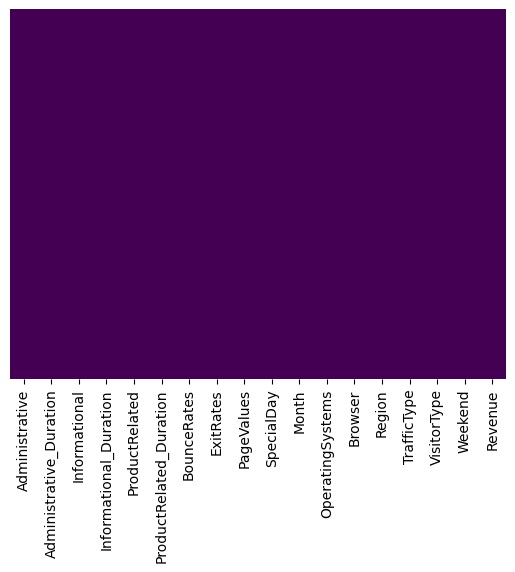

In [4]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<h5>Result</h5>
no missing values

<h4>Checking datatypes of attributes<h4>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

changing object dtype attributes to string dtype attributes

In [6]:
df['VisitorType'] = df['VisitorType'].astype('string')
df['Month'] = df['Month'].astype('string')

In [7]:
df[['VisitorType', 'Month']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   VisitorType  12330 non-null  string
 1   Month        12330 non-null  string
dtypes: string(2)
memory usage: 192.8 KB


<h4>Handling Bool and Categorical Attributes</h4>  

In [8]:
from sklearn.preprocessing import OrdinalEncoder

<Axes: xlabel='VisitorType', ylabel='count'>

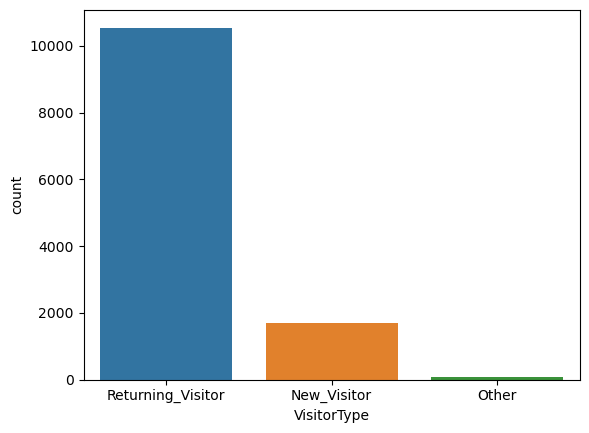

In [9]:
sns.countplot(df, x = 'VisitorType')

<h4>Using OrdinalEncoder</h4>

In [10]:
ordinal_encoder = OrdinalEncoder()
df['VisitorType'] = ordinal_encoder.fit_transform(df[['VisitorType']])
df['Weekend'] = ordinal_encoder.fit_transform(df[['Weekend']])
df['Revenue'] = ordinal_encoder.fit_transform(df[['Revenue']])

<Axes: xlabel='Month', ylabel='count'>

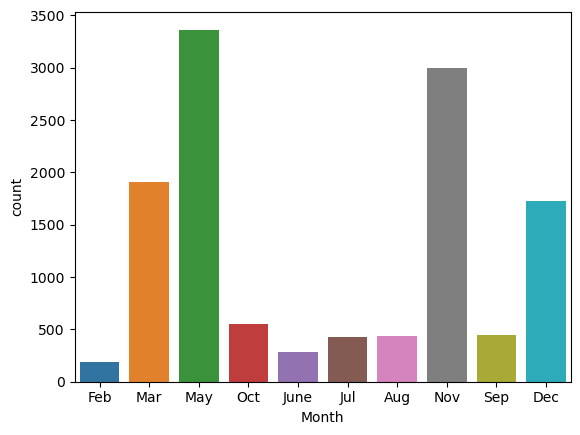

In [11]:
sns.countplot(df, x='Month')

<h5>Observations</h5>
No January, April sessions 

<h5>Creating season(Winter, Spring, Summer, Autumn) attribute</h5>

In [12]:
season_dic = {'Feb': 'Winter', 'Dec': 'Winter', 'Mar': 'Spring', 'May': 'Spring', 'June': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer', 'Sep': 'Autumn', 'Oct': 'Autumn', 'Nov': 'Autumn'}
df['Season'] = df['Month'].map(season_dic)

<Axes: xlabel='Season', ylabel='count'>

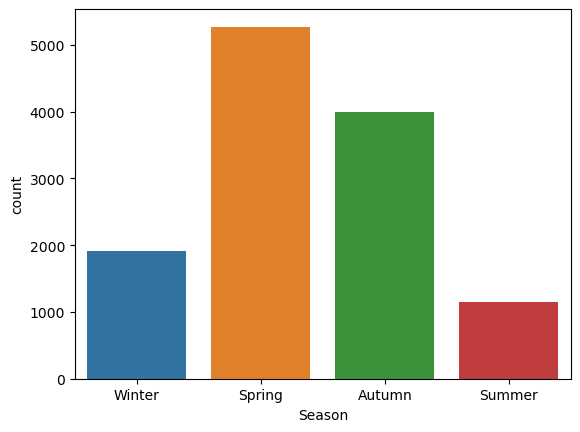

In [13]:
sns.countplot(df, x='Season')

<h5>Observation</h5>
Majority of sessions was recorded in spring and autumn

<h4>Investigation of relationship between time features and revenue</h4>

Text(0.5, 1.0, 'Not Weekend')

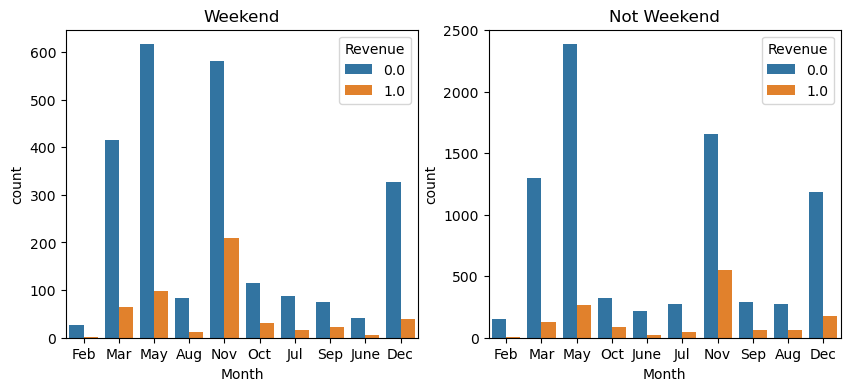

In [14]:
plt.figure(figsize = (10, 4))
plt.subplot(121)
sns.countplot(data = df[df['Weekend'] == 1], x = 'Month', hue = 'Revenue')
plt.title('Weekend')
plt.subplot(122)
sns.countplot(data = df[df['Weekend'] == 0], x = 'Month', hue = 'Revenue')
plt.title('Not Weekend')

<Axes: xlabel='Season', ylabel='count'>

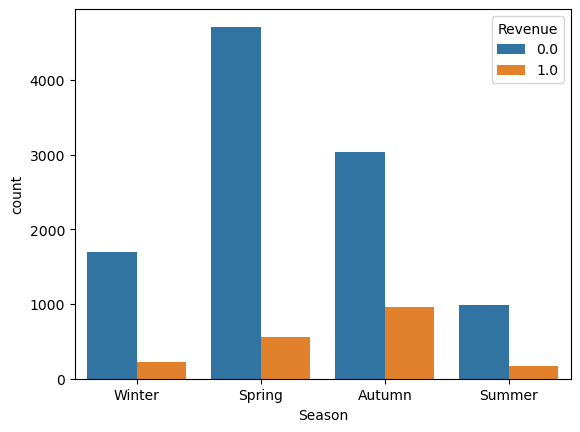

In [15]:
sns.countplot(data = df, x = 'Season', hue = 'Revenue')

<h5>Observation</h5>
Majority of purchases are done in spring and autumn seasons

<h4>Investigation of relationship between special day presence and purchase intention</h4> 

<Axes: xlabel='SpecialDay', ylabel='count'>

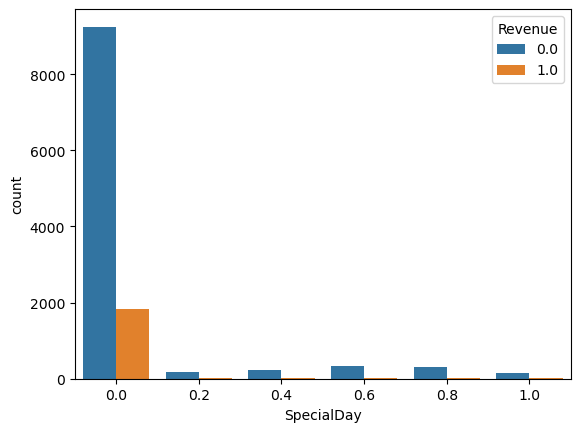

In [16]:
sns.countplot(data = df, x = 'SpecialDay', hue = 'Revenue')

<h5>Observation</h5> 
Majority of website visits and purchases in done on Non-Special Days

<h4>Using One Hot Encoding for Season and Month Attributes</h4> 

In [17]:
df = pd.get_dummies(df, columns = ['Season'], drop_first = True)
df = pd.get_dummies(df, columns = ['Month'], drop_first = True)

In [18]:
df

Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000   
2                         0.0               1                 0.000000   
3                         0.0               2                 2.666667   
4                         0.0              10               627.500000   
...                       ...             ...                      ...   
12325                     0.0              53              1783.791667   
12326                     0.0               5               465.750000   
12327                     0.0               6               184.250000   
12328                     0.0              15               346.000000   
12329                     0.0               3                21.250000   

       BounceRates  ExitRates  PageValues  SpecialDay  ...  Season_Winter  \
0         0.200000   0.200000    0.000000         0.0  ...              1   
1         0.000000   0.100000    0.000000         0.0  ...              1   
2         0.200000   0.200000    0.000000         0.0  ...              1   
3         0.050000   0.140000    0.000000         0.0  ...              1   
4         0.020000   0.050000    0.000000         0.0  ...              1   
...            ...        ...         ...         ...  ...            ...   
12325     0.007143   0.029031   12.241717         0.0  ...              1   
12326     0.000000   0.021333    0.000000         0.0  ...              0   
12327     0.083333   0.086667    0.000000         0.0  ...              0   
12328     0.000000   0.021053    0.000000         0.0  ...              0   
12329     0.000000   0.066667    0.000000         0.0  ...              0   

       Month_Dec  Month_Feb  Month_Jul  Month_June  Month_Mar  Month_May  \
0              0          1          0           0          0          0   
1              0          1          0           0          0          0   
2              0          1          0           0          0          0   
3              0          1          0           0          0          0   
4              0          1          0           0          0          0   
...          ...        ...        ...         ...        ...        ...   
12325          1          0          0           0          0          0   
12326          0          0          0           0          0          0   
12327          0          0          0           0          0          0   
12328          0          0          0           0          0          0   
12329          0          0          0           0          0          0   

       Month_Nov  Month_Oct  Month_Sep  
0              0          0          0  
1              0          0          0  
2              0          0          0  
3              0          0          0  
4              0          0          0  
...          ...        ...        ...  
12325          0          0          0  
12326          1          0          0  
12327          1          0          0  
12328          1          0          0  
12329          1          0          0  

[12330

<h4>Checking correlations by plotting heatmap<h4>

<Axes: >

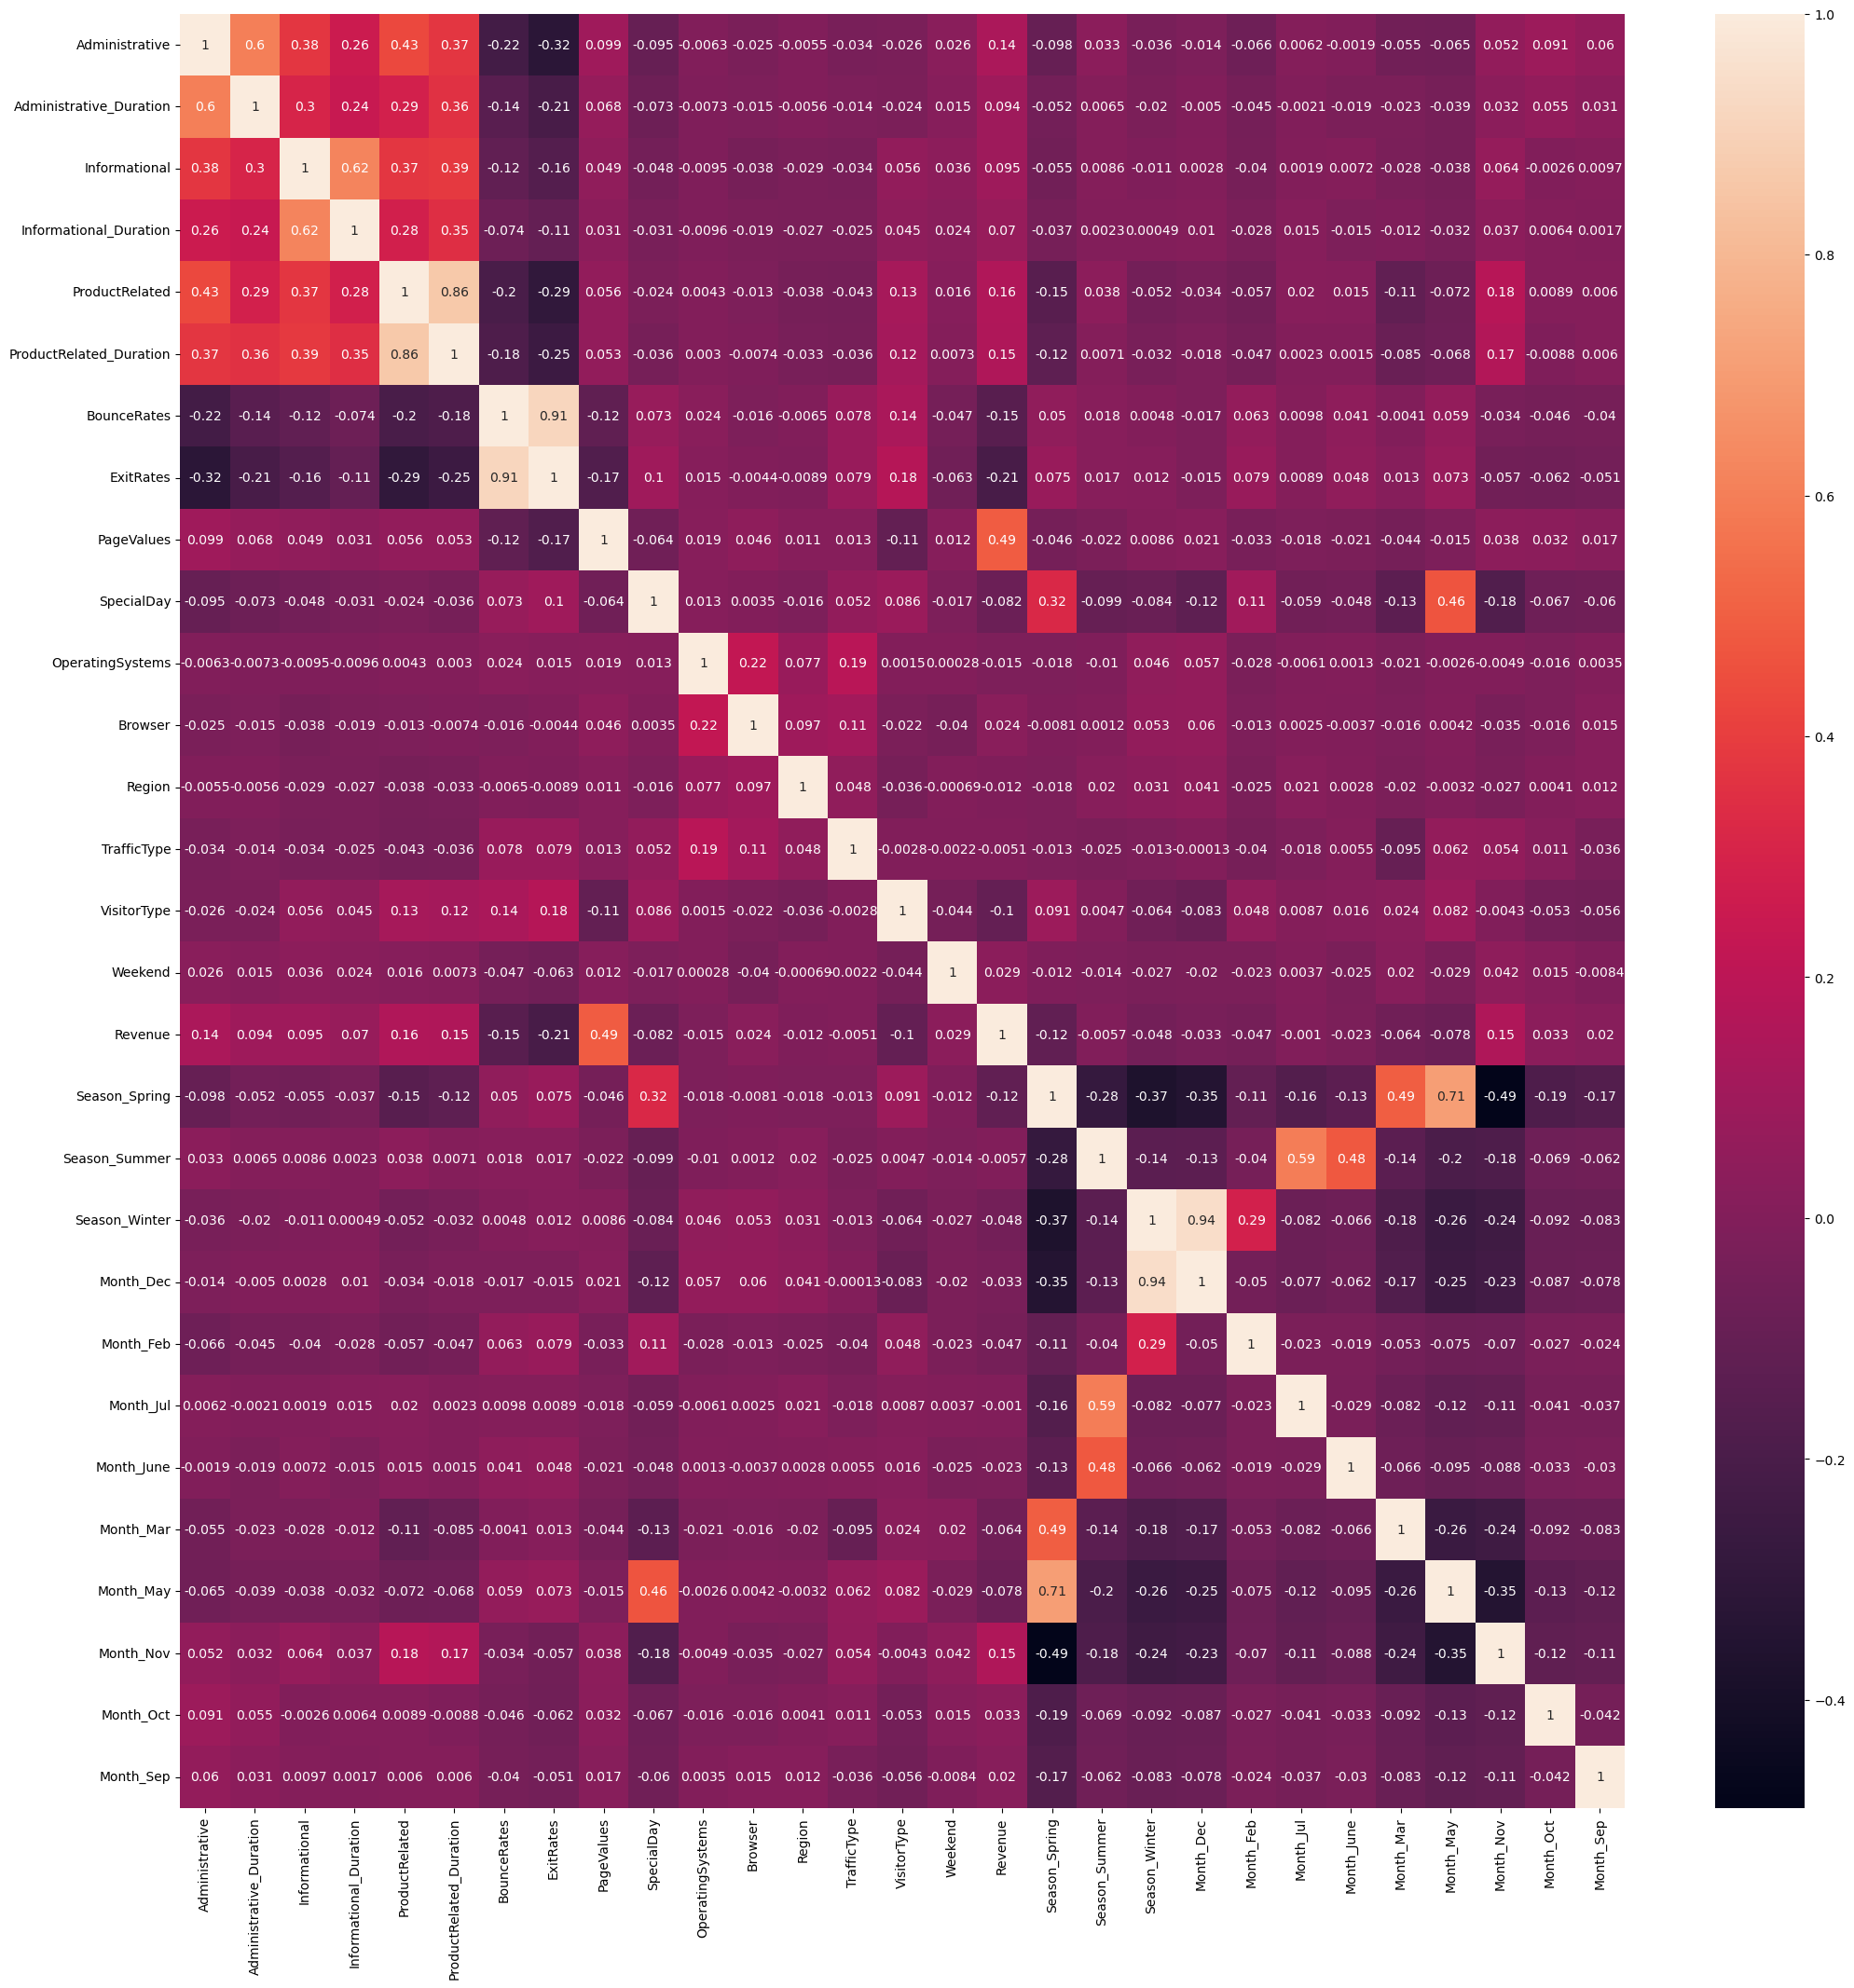

In [19]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True)

<h5>Observation</h5>
Top High-Correlated Attributes are:
<ul>
    <li>PageValues(0.49)</li>
    <li>ExitRates(-0.21)</li>
    <li>ProductRelated(0.16)</li>
</ul>
Top Low-Correlated Attributes are:
<ul>
    <li>TrafficType(0.005)</li>
    <li>Region(0.011)</li>
    <li>OperatingSystems(0.014)</li>
</ul>
We have multicollinearity between 
<ul> 
    <li>Types of pages visited by the visitor in that session and total time spent in each of these page categories</li>
    <li>Bounce rates and Exit rates</li>
</ul>

<h4>Standard Scaling numerical features</h4>

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
std_scl = StandardScaler()
num_attributes = ['Administrative', 'Informational', 'ProductRelated','Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues']
for i in range(len(num_attributes)):
    df[num_attributes[i]] = std_scl.fit_transform(df[[num_attributes[i]]])

<h4>Checking correlations after scaling</h4>

<Axes: >

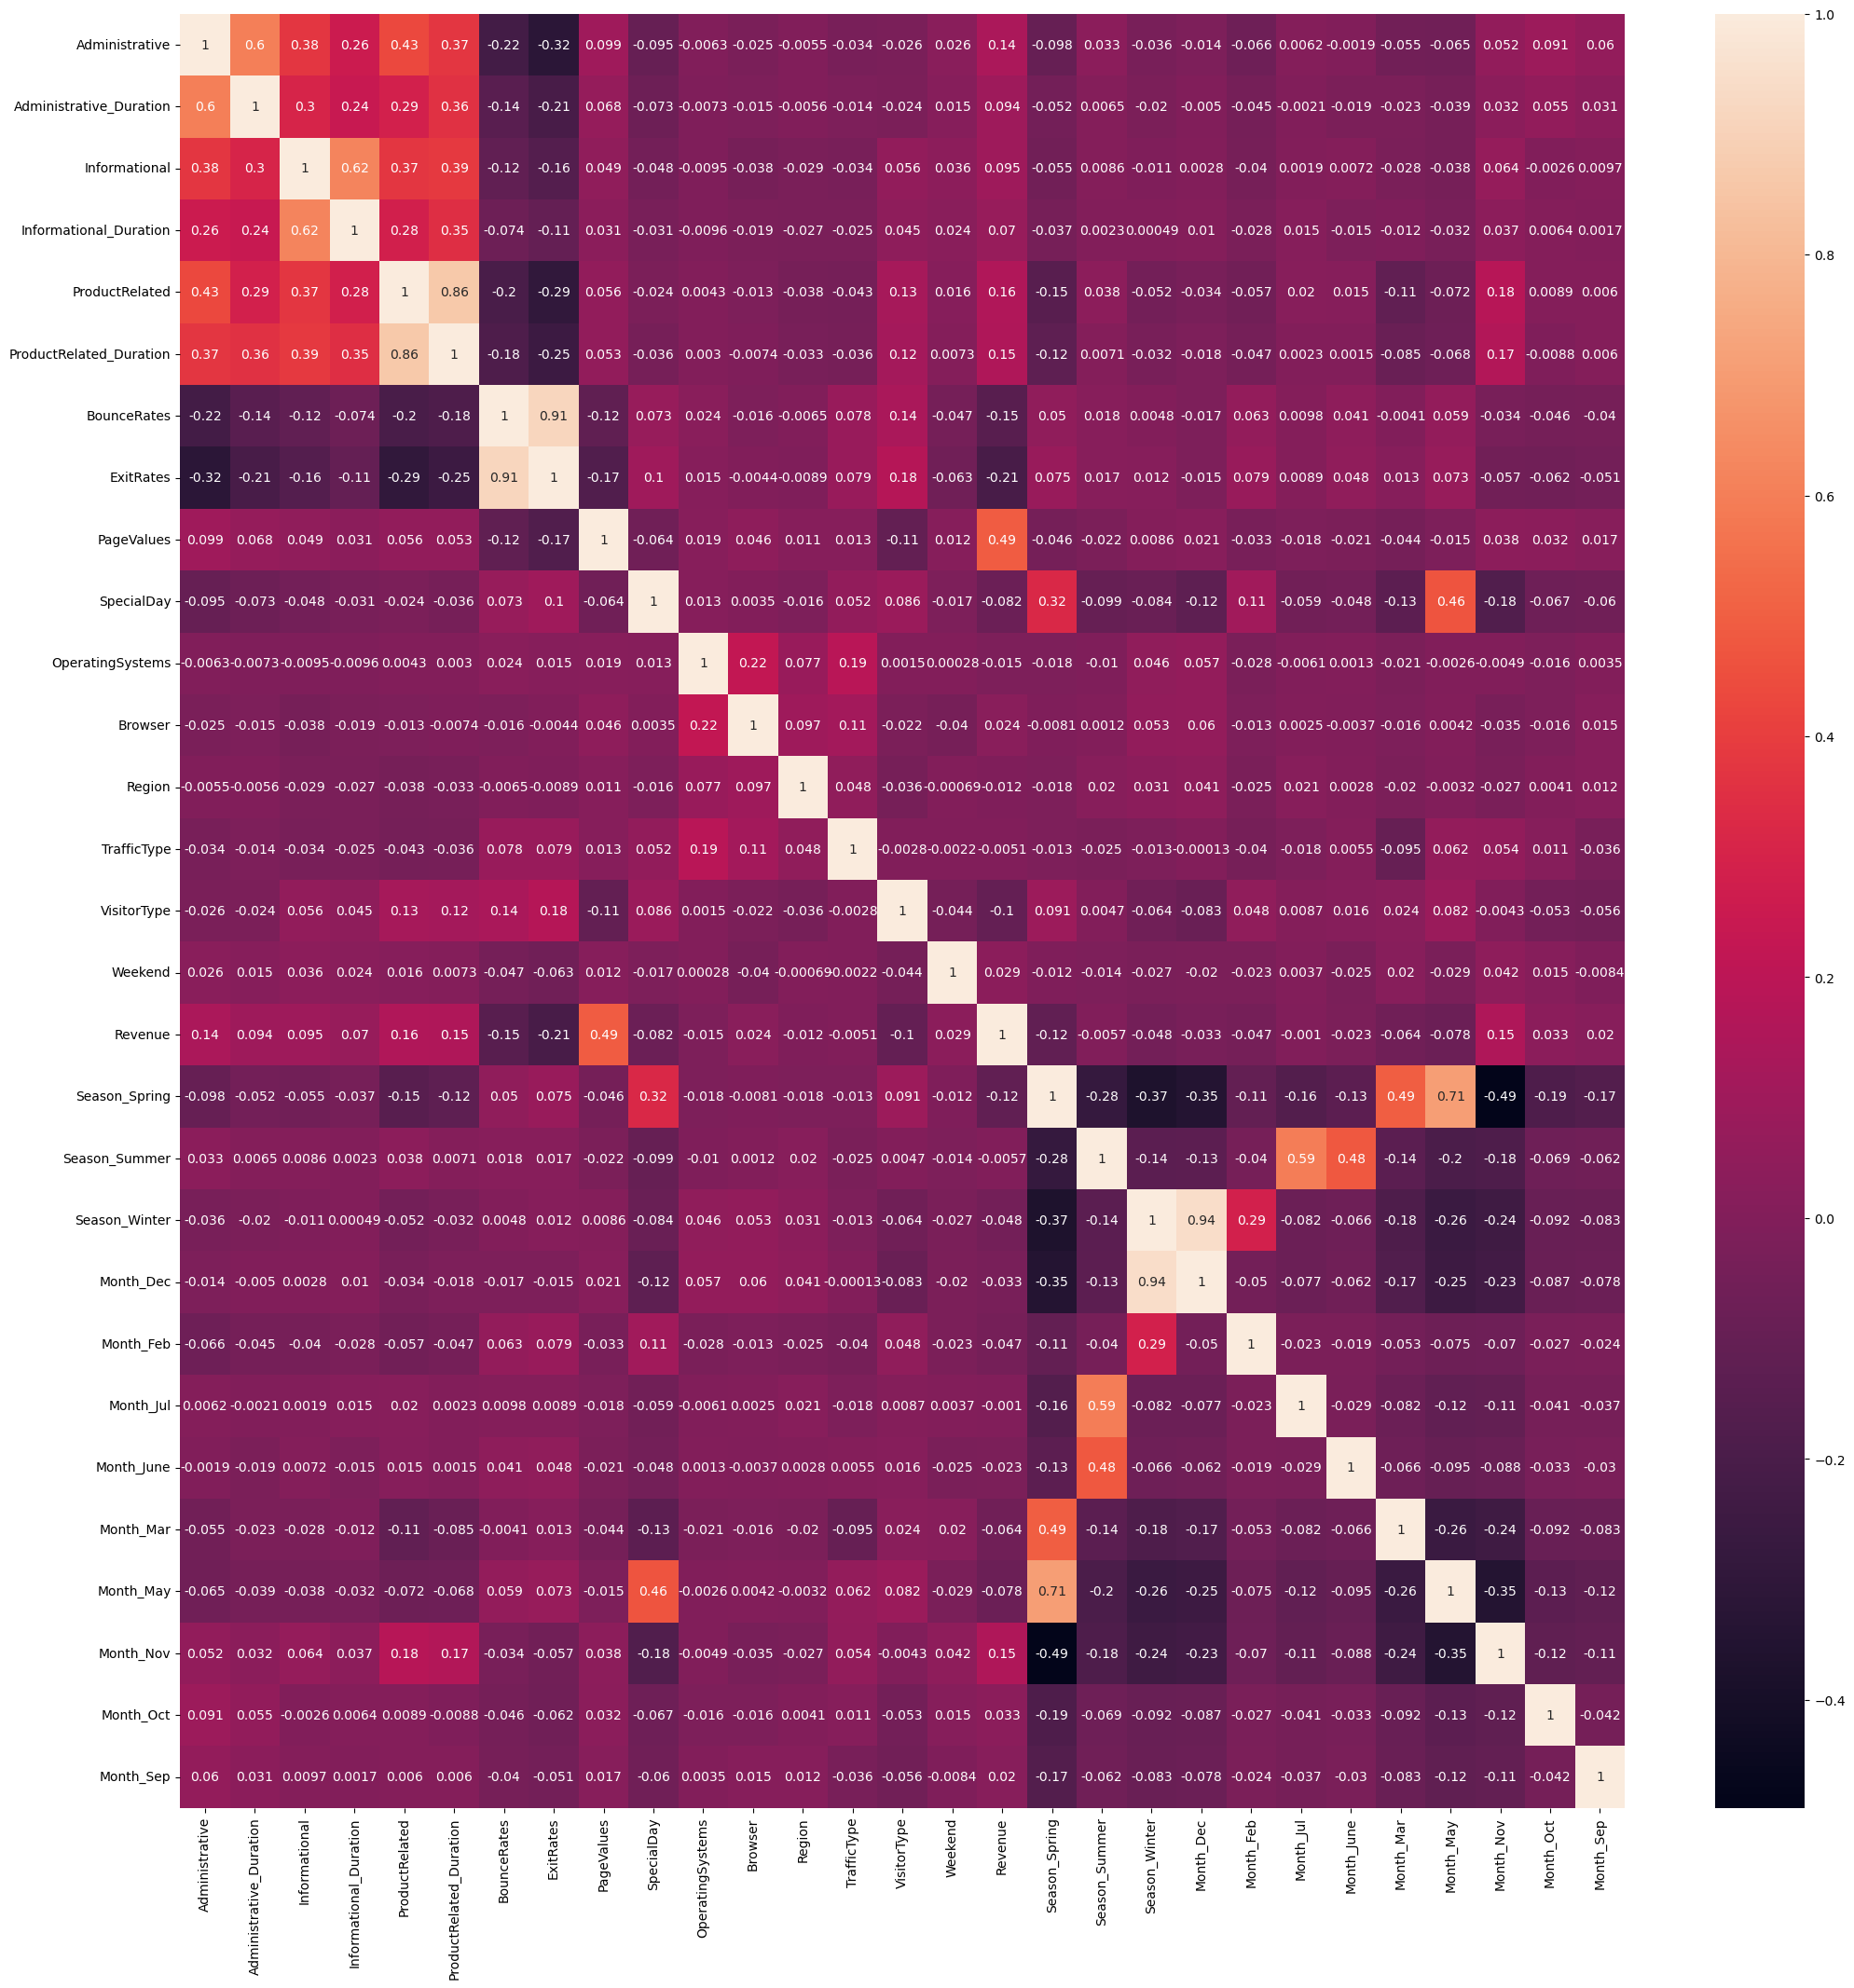

In [22]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True)

no major changes

<h4>Exploration of multicollinearity</h4>

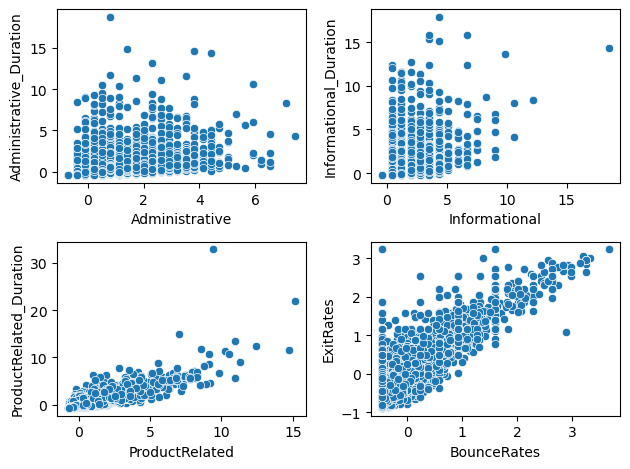

In [23]:
plt.subplot(2, 2, 1)
sns.scatterplot(df, x = 'Administrative', y = 'Administrative_Duration')
plt.subplot(2, 2, 2)
sns.scatterplot(df, x = 'Informational', y = 'Informational_Duration')
plt.subplot(2, 2, 3)
sns.scatterplot(df, x = 'ProductRelated', y = 'ProductRelated_Duration')
plt.subplot(2, 2, 4)
sns.scatterplot(df, x = 'BounceRates', y = 'ExitRates')
plt.tight_layout()

<h5>Observation</h5> 
<ul> 
    <li>Visited product related pages and total time spent in these page category have linear dependancy</li>
    <li>Exit and Bounce rates have linear dependancy</li>
</ul>

<h5>Strategy for multicollinearity redunction</h5>
<ol>
    <li>Create new attributes by math operations and check correlation degree</li>
    <li>Create new clusters by usage of high-correlated attributes</li>
</ol>

In [24]:
df['Adm'] = df['Administrative'] / df['Administrative_Duration']
df['Inf'] = df['Informational'] / df['Informational_Duration']
df['PR'] = df['ProductRelated_Duration'] / df['ProductRelated']
df['Rates'] = df['ExitRates'] / df['BounceRates']

In [25]:
abs(df[['Revenue', 'Administrative', 'Administrative_Duration', 'Adm', 'Informational', 'Informational_Duration', 'Inf', 'PR', 'ProductRelated_Duration', 'ProductRelated', 'Rates', 'ExitRates', 'BounceRates']].corr()['Revenue']).sort_values()

Adm                        0.004767
PR                         0.006581
Rates                      0.007135
Inf                        0.019196
Informational_Duration     0.070345
Administrative_Duration    0.093587
Informational              0.095200
Administrative             0.138917
BounceRates                0.150673
ProductRelated_Duration    0.152373
ProductRelated             0.158538
ExitRates                  0.207071
Revenue                    1.000000
Name: Revenue, dtype: float64

<ul>
<li>Administrative (0.138) and Administrative_Duration (0.093) = Adm (0.004)</li>
<li>Informational (0.095) and Informational_Duration (0.07) = Inf (0.019)</li>
<li>ProductRelated (0.158) and ProductRelated_Duration (0.152) = PR (0.006)</li>
<li>BonusRates (0.15) and ExitRates (0.2) = Rates (0.007)</li>
</ul>

In [26]:
df.drop(['Adm', 'Inf', 'PR', 'Rates'], axis = 1, inplace = True)

In [27]:
df['Adm'] = df['Administrative'] * df['Administrative_Duration']
df['Inf'] = df['Informational'] * df['Informational_Duration']
df['PR'] = df['ProductRelated_Duration'] * df['ProductRelated']
df['Rates'] = df['ExitRates'] * df['BounceRates']

In [28]:
abs(df[['Revenue', 'Administrative', 'Administrative_Duration', 'Adm', 'Informational', 'Informational_Duration', 'Inf', 'PR', 'ProductRelated_Duration', 'ProductRelated', 'Rates', 'ExitRates', 'BounceRates']].corr()['Revenue']).sort_values()

Inf                        0.032916
PR                         0.048559
Adm                        0.049181
Informational_Duration     0.070345
Administrative_Duration    0.093587
Informational              0.095200
Rates                      0.105346
Administrative             0.138917
BounceRates                0.150673
ProductRelated_Duration    0.152373
ProductRelated             0.158538
ExitRates                  0.207071
Revenue                    1.000000
Name: Revenue, dtype: float64

<ul>
<li>Administrative (0.138) and Administrative_Duration (0.093) = Adm (0.049)</li>
<li>Informational (0.095) and Informational_Duration (0.07) = Inf (0.033)</li>
<li>ProductRelated (0.158) and ProductRelated_Duration (0.152) = PR (0.048)</li>
<li>BonusRates (0.15) and ExitRates (0.2) = Rates (0.105)</li>
</ul>

In [29]:
df.drop(['Adm', 'Inf', 'PR', 'Rates'], axis = 1, inplace = True)

In [30]:
df['Adm'] = df['Administrative'] + df['Administrative_Duration']
df['Inf'] = df['Informational'] + df['Informational_Duration']
df['PR'] = df['ProductRelated_Duration'] + df['ProductRelated']
df['Rates'] = df['ExitRates'] + df['BounceRates']

In [31]:
abs(df[['Revenue', 'Administrative', 'Administrative_Duration', 'Adm', 'Informational', 'Informational_Duration', 'Inf', 'PR', 'ProductRelated_Duration', 'ProductRelated', 'Rates', 'ExitRates', 'BounceRates']].corr()['Revenue']).sort_values()

Informational_Duration     0.070345
Inf                        0.091999
Administrative_Duration    0.093587
Informational              0.095200
Adm                        0.129909
Administrative             0.138917
BounceRates                0.150673
ProductRelated_Duration    0.152373
ProductRelated             0.158538
PR                         0.161159
Rates                      0.182894
ExitRates                  0.207071
Revenue                    1.000000
Name: Revenue, dtype: float64

<ul>
<li>Administrative (0.1389) and Administrative_Duration (0.093) = Adm (0.13)</li>
<li>Informational (0.095) and Informational_Duration (0.07) = Inf (0.093)</li>
<li>ProductRelated (0.1585) and ProductRelated_Duration (0.152) = PR (0.16)</li>
<li>BonusRates (0.15) and ExitRates (0.2) = Rates (0.182)</li>
</ul>

<h5>PR good result</h5>

In [32]:
df.drop(['Adm', 'Inf', 'PR', 'Rates'], axis = 1, inplace = True)

In [33]:
df['Adm'] = df['Administrative_Duration'] / df['Administrative']
df['Inf'] = df['Informational_Duration'] / df['Informational']
df['PR'] = df['ProductRelated'] / df['ProductRelated_Duration']
df['Rates'] = df['BounceRates'] / df['ExitRates'] 

In [34]:
abs(df[['Revenue', 'Administrative', 'Administrative_Duration', 'Adm', 'Informational', 'Informational_Duration', 'Inf', 'PR', 'ProductRelated_Duration', 'ProductRelated', 'Rates', 'ExitRates', 'BounceRates']].corr()['Revenue']).sort_values()

Inf                        0.001353
Rates                      0.005062
Adm                        0.016195
PR                         0.020754
Informational_Duration     0.070345
Administrative_Duration    0.093587
Informational              0.095200
Administrative             0.138917
BounceRates                0.150673
ProductRelated_Duration    0.152373
ProductRelated             0.158538
ExitRates                  0.207071
Revenue                    1.000000
Name: Revenue, dtype: float64

<ul>
<li>Administrative (0.1389) and Administrative_Duration (0.093) = Adm (0.016)</li>
<li>Informational (0.095) and Informational_Duration (0.07) = Inf (0.0013)</li>
<li>ProductRelated (0.1585) and ProductRelated_Duration (0.152) = PR (0.02)</li>
<li>BonusRates (0.15) and ExitRates (0.2) = Rates (0.005)</li>
</ul>

In [35]:
df.drop(['Adm', 'Inf', 'PR', 'Rates'], axis = 1, inplace = True)

In [36]:
df['Adm_and_Inf'] = df['Administrative'] * df['Administrative_Duration'] + df['Informational'] * df['Informational_Duration']

In [37]:
abs(df[['Revenue', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'Adm_and_Inf']].corr()['Revenue']).sort_values()

Adm_and_Inf                0.045718
Informational_Duration     0.070345
Administrative_Duration    0.093587
Informational              0.095200
Administrative             0.138917
Revenue                    1.000000
Name: Revenue, dtype: float64

In [38]:
df.drop(['Adm_and_Inf'], axis = 1, inplace = True)

In [39]:
df['Adm'] = pow(df['Administrative'], df['Administrative_Duration'])
df['Inf'] = pow(df['Informational'], df['Informational_Duration'])
df['Rates'] = pow(df['ExitRates'], df['BounceRates'])

In [40]:
abs(df[['Revenue', 'Adm', 'Administrative', 'Administrative_Duration', 'Inf', 'Informational','Informational_Duration', 'Rates', 'ExitRates', 'BounceRates']].corr()['Revenue']).sort_values()

Adm                        0.009810
Inf                        0.010747
Informational_Duration     0.070345
Rates                      0.082428
Administrative_Duration    0.093587
Informational              0.095200
Administrative             0.138917
BounceRates                0.150673
ExitRates                  0.207071
Revenue                    1.000000
Name: Revenue, dtype: float64

<ul>
<li>Administrative (0.1389) and Administrative_Duration (0.093) = Adm (0.009)</li>
<li>Informational (0.095) and Informational_Duration (0.07) = Inf (0.01)</li>
<li>BonusRates (0.15) and ExitRates (0.2) = Rates (0.08)</li>
</ul>

In [41]:
df.drop(['Adm', 'Inf', 'Rates'], axis = 1, inplace = True)

<h5>Note</h5>
New created features that do exceed correlations they are created with are droped
New created features that exceed correlations they are created with are returned

In [42]:
df['PR'] = df['ProductRelated_Duration'] + df['ProductRelated']

<h4>Trying clustering application</h4>

<Axes: xlabel='ProductRelated_Duration', ylabel='ExitRates'>

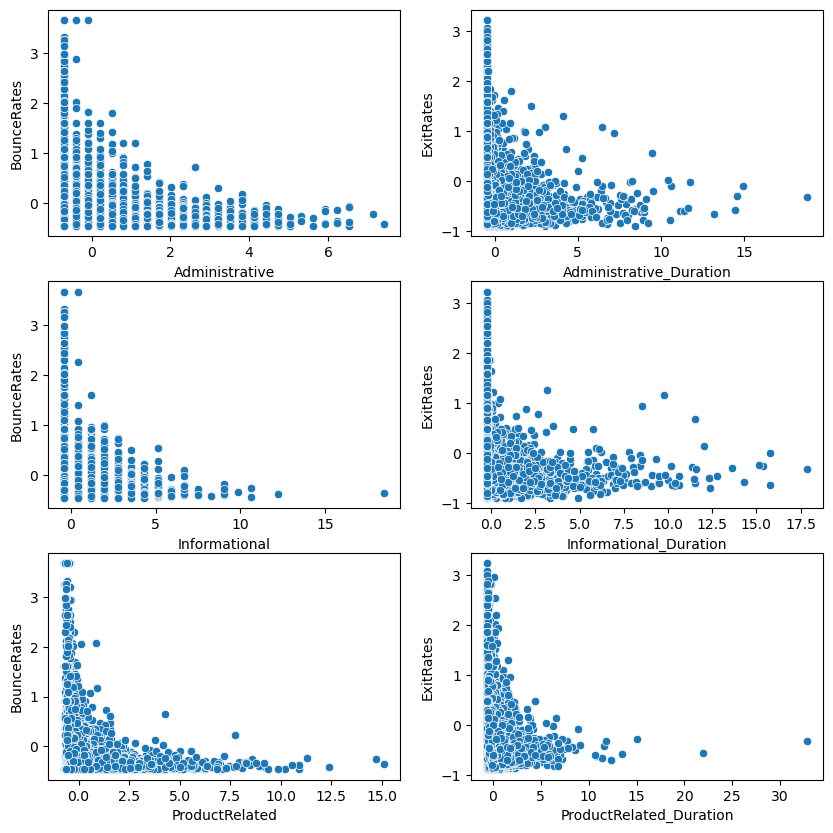

In [43]:
plt.figure(figsize = (10, 10))
plt.subplot(321)
sns.scatterplot(data = df, x = 'Administrative', y = 'BounceRates')
plt.subplot(322)
sns.scatterplot(data = df, x = 'Administrative_Duration', y = 'ExitRates')
plt.subplot(323)
sns.scatterplot(data = df, x = 'Informational', y = 'BounceRates')
plt.subplot(324)
sns.scatterplot(data = df, x = 'Informational_Duration', y = 'ExitRates')
plt.subplot(325)
sns.scatterplot(data = df, x = 'ProductRelated', y = 'BounceRates')
plt.subplot(326)
sns.scatterplot(data = df, x = 'ProductRelated_Duration', y = 'ExitRates')

To find appropriate number of clusters I used elbow method 
<ol>
    <li>Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.</li>
    <li>For each k, calculate the total within-cluster sum of square(wcss).</li>
    <li>Plot the curve of wss according to the number of clusters k.</li>
    <li>Select the value of k at the “elbow” ie the point after which the wcss starts decreasing in a linear fashion.</li>
<ol>

In [44]:
from sklearn.cluster import KMeans

In [45]:
adm_b, adm_e = df[["Administrative", "BounceRates"]], df[["Administrative_Duration", "ExitRates"]]
inf_b, inf_e = df[["Informational", "BounceRates"]], df[["Informational_Duration", "ExitRates"]]
pr_b, pr_e = df[["ProductRelated", "BounceRates"]], df[["ProductRelated_Duration", "ExitRates"]]

In [46]:
def elbow(x):
    wcss = []
    for i in range(1, 11): 
        kmeans = KMeans(n_clusters = i, n_init = 10, random_state = 42)
        kmeans.fit(x) 
        wcss.append(kmeans.inertia_)
    return wcss

In [47]:
wcss_adm_b, wcss_adm_e = elbow(adm_b), elbow(adm_e)
wcss_inf_b, wcss_inf_e = elbow(inf_b), elbow(inf_e)
wcss_pr_b, wcss_pr_e = elbow(pr_b), elbow(pr_e)

Text(0.5, 1.0, 'ProductRelatedDuration&ExitRates')

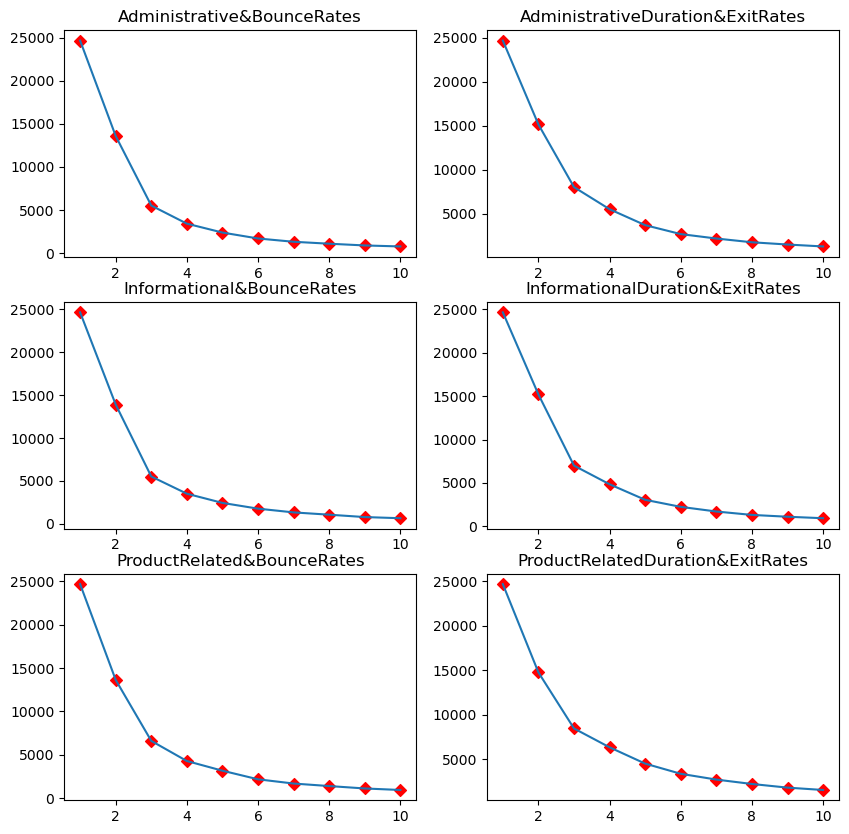

In [48]:
plt.figure(figsize = (10, 10))
plt.subplot(321)
sns.lineplot(x = range(1, 11), y = wcss_adm_b)
plt.scatter(x = range(1, 11), y = wcss_adm_b, color = 'red', marker = 'D')
plt.title('Administrative&BounceRates')
plt.subplot(322)
sns.lineplot(x = range(1, 11), y = wcss_adm_e)
plt.scatter(x = range(1, 11), y = wcss_adm_e, color = 'red', marker = 'D')
plt.title('AdministrativeDuration&ExitRates')
plt.subplot(323)
sns.lineplot(x = range(1, 11), y = wcss_inf_b)
plt.scatter(x = range(1, 11), y = wcss_inf_b, color = 'red', marker = 'D')
plt.title('Informational&BounceRates')
plt.subplot(324)
sns.lineplot(x = range(1, 11), y = wcss_inf_e)
plt.scatter(x = range(1, 11), y = wcss_inf_e, color = 'red', marker = 'D')
plt.title('InformationalDuration&ExitRates')
plt.subplot(325)
sns.lineplot(x = range(1, 11), y = wcss_pr_b)
plt.scatter(x = range(1, 11), y = wcss_pr_b, color = 'red', marker = 'D')
plt.title('ProductRelated&BounceRates')
plt.subplot(326)
sns.lineplot(x = range(1, 11), y = wcss_pr_e)
plt.scatter(x = range(1, 11), y = wcss_pr_e, color = 'red', marker = 'D')
plt.title('ProductRelatedDuration&ExitRates')

<h5>Results of elbow method</h5>
Optimal K for: 
<ul>
    <li>Administrative and Bounce Rates is 3</li>
    <li>Administrative Duration and Exit Rates is 3</li>
    <li>Informational and Bounce Rates is 3</li>
    <li>Informational Duration and Exit Rates is 3</li>
    <li>Product Related and Bounce Rates is 3</li>
    <li>Product Related Duration and Exit Rates is 3</li>
</ul>

In [49]:
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
df['AdmBR'] = kmeans.fit_predict(adm_b)
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
df['AdmDER'] = kmeans.fit_predict(adm_e)
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
df['InfBR'] = kmeans.fit_predict(inf_b)
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
df['InfDER'] = kmeans.fit_predict(inf_e)
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
df['PRBR'] = kmeans.fit_predict(pr_b)
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
df['PRDER'] = kmeans.fit_predict(pr_e)

Text(0.5, 1.0, 'ProductRelated&ExitRates')

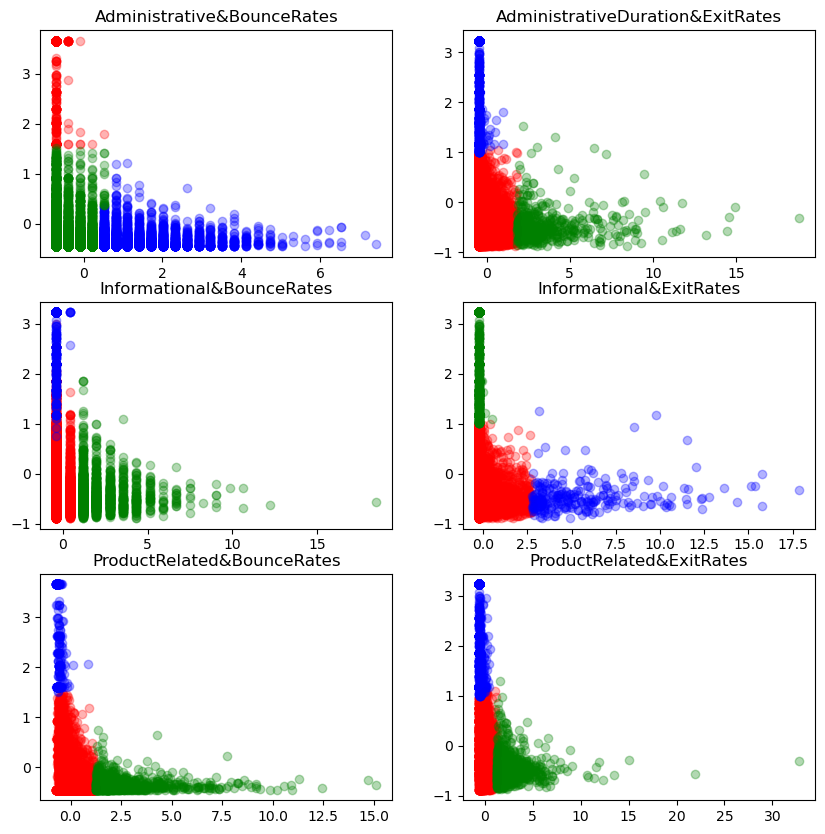

In [50]:
plt.figure(figsize = (10, 10))
plt.subplot(321)
plt.scatter(x = df[df['AdmBR'] == 0]['Administrative'], y = df[df['AdmBR'] == 0]['BounceRates'], c = 'red', alpha = 0.3)
plt.scatter(x = df[df['AdmBR'] == 1]['Administrative'], y = df[df['AdmBR'] == 1]['BounceRates'], c = 'blue', alpha = 0.3)
plt.scatter(x = df[df['AdmBR'] == 2]['Administrative'], y = df[df['AdmBR'] == 2]['BounceRates'], c = 'green', alpha = 0.3)
plt.title('Administrative&BounceRates')
plt.subplot(322)
plt.scatter(x = df[df['AdmDER'] == 0]['Administrative_Duration'], y = df[df['AdmDER'] == 0]['ExitRates'], c = 'red', alpha = 0.3)
plt.scatter(x = df[df['AdmDER'] == 1]['Administrative_Duration'], y = df[df['AdmDER'] == 1]['ExitRates'], c = 'blue', alpha = 0.3)
plt.scatter(x = df[df['AdmDER'] == 2]['Administrative_Duration'], y = df[df['AdmDER'] == 2]['ExitRates'], c = 'green', alpha = 0.3)
plt.title('AdministrativeDuration&ExitRates')
plt.subplot(323)
plt.scatter(x = df[df['InfBR'] == 0]['Informational'], y = df[df['InfBR'] == 0]['ExitRates'], c = 'red', alpha = 0.3)
plt.scatter(x = df[df['InfBR'] == 1]['Informational'], y = df[df['InfBR'] == 1]['ExitRates'], c = 'blue', alpha = 0.3)
plt.scatter(x = df[df['InfBR'] == 2]['Informational'], y = df[df['InfBR'] == 2]['ExitRates'], c = 'green', alpha = 0.3)
plt.title('Informational&BounceRates')
plt.subplot(324)
plt.scatter(x = df[df['InfDER'] == 0]['Informational_Duration'], y = df[df['InfDER'] == 0]['ExitRates'], c = 'red', alpha = 0.3)
plt.scatter(x = df[df['InfDER'] == 1]['Informational_Duration'], y = df[df['InfDER'] == 1]['ExitRates'], c = 'blue', alpha = 0.3)
plt.scatter(x = df[df['InfDER'] == 2]['Informational_Duration'], y = df[df['InfDER'] == 2]['ExitRates'], c = 'green', alpha = 0.3)
plt.title('Informational&ExitRates')
plt.subplot(325)
plt.scatter(x = df[df['PRBR'] == 0]['ProductRelated'], y = df[df['PRBR'] == 0]['BounceRates'], c = 'red', alpha = 0.3)
plt.scatter(x = df[df['PRBR'] == 1]['ProductRelated'], y = df[df['PRBR'] == 1]['BounceRates'], c = 'blue', alpha = 0.3)
plt.scatter(x = df[df['PRBR'] == 2]['ProductRelated'], y = df[df['PRBR'] == 2]['BounceRates'], c = 'green', alpha = 0.3)
plt.title('ProductRelated&BounceRates')
plt.subplot(326)
plt.scatter(x = df[df['PRDER'] == 0]['ProductRelated_Duration'], y = df[df['PRDER'] == 0]['ExitRates'], c = 'red', alpha = 0.3)
plt.scatter(x = df[df['PRDER'] == 1]['ProductRelated_Duration'], y = df[df['PRDER'] == 1]['ExitRates'], c = 'blue', alpha = 0.3)
plt.scatter(x = df[df['PRDER'] == 2]['ProductRelated_Duration'], y = df[df['PRDER'] == 2]['ExitRates'], c = 'green', alpha = 0.3)
plt.title('ProductRelated&ExitRates')

In [51]:
abs(df[['Revenue', 'BounceRates', 'ExitRates', 'Administrative', 'Administrative_Duration', 'Informational','Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'AdmBR', 'AdmDER', 'InfBR', 'InfDER', 'PRBR', 'PRDER']].corr()['Revenue']).sort_values()

AdmBR                      0.014494
PRDER                      0.021546
InfBR                      0.040576
PRBR                       0.048140
AdmDER                     0.054704
Informational_Duration     0.070345
Administrative_Duration    0.093587
Informational              0.095200
Administrative             0.138917
InfDER                     0.139892
BounceRates                0.150673
ProductRelated_Duration    0.152373
ProductRelated             0.158538
ExitRates                  0.207071
Revenue                    1.000000
Name: Revenue, dtype: float64

<h5>Note</h5>
As 'AdmBR', 'PRDER', 'AdmDER', 'PRBR', 'InfBR' features demonstrate low-correlations, so they will be dropped<br>
'InfDER' will be left in case they will demonstrate low-correlation with high-correlated with 'Revenue' column features and can be used

In [52]:
df.drop(['AdmBR', 'AdmDER', 'PRDER', 'PRBR', 'InfBR',], axis = 1, inplace = True)

<h4>Dealing with Low-Correlated features</h4>
TrafficType and Region

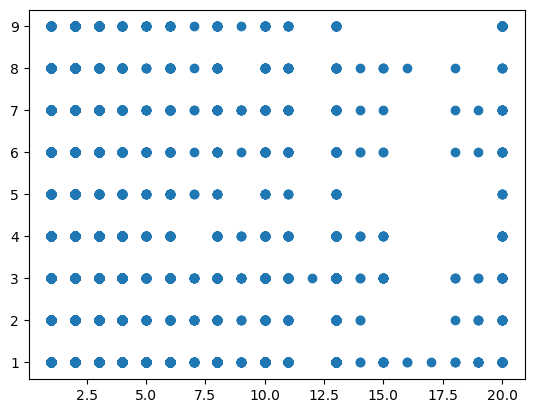

In [53]:
plt.scatter(x = df['TrafficType'], y = df['Region'])

In [54]:
trf_r = df[['TrafficType', 'Region']]
wcss_tr = elbow(trf_r)

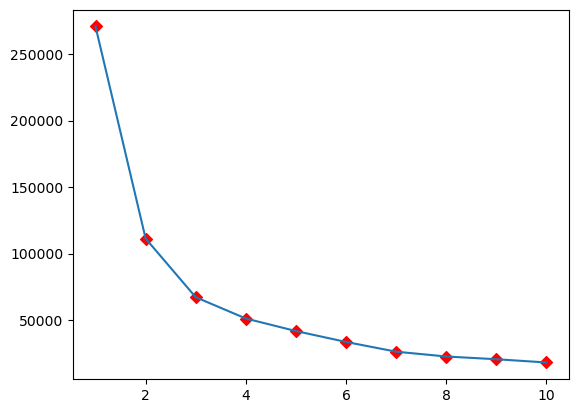

In [55]:
sns.lineplot(x = range(1, 11), y = wcss_tr)
plt.scatter(x = range(1, 11), y = wcss_tr, color = 'red', marker = 'D')

optimal number for k is 3

Text(0.5, 1.0, 'Administrative&BounceRates')

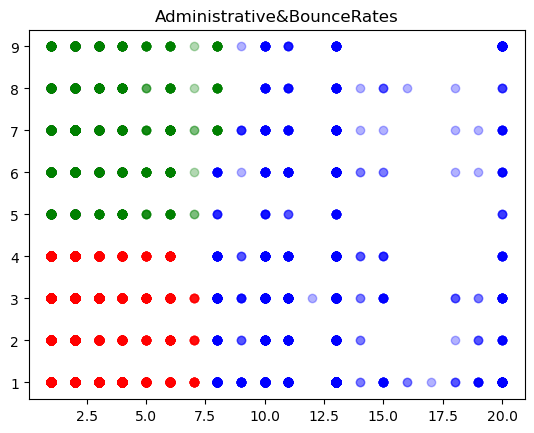

In [56]:
kmeans = KMeans(n_clusters = 3, n_init = 10, random_state = 42)
df['TrfR'] = kmeans.fit_predict(trf_r)
plt.scatter(x = df[df['TrfR'] == 0]['TrafficType'], y = df[df['TrfR'] == 0]['Region'], c = 'red', alpha = 0.3)
plt.scatter(x = df[df['TrfR'] == 1]['TrafficType'], y = df[df['TrfR'] == 1]['Region'], c = 'blue', alpha = 0.3)
plt.scatter(x = df[df['TrfR'] == 2]['TrafficType'], y = df[df['TrfR'] == 2]['Region'], c = 'green', alpha = 0.3)
plt.title('Administrative&BounceRates')

In [57]:
df.corr()['Revenue'][['TrfR', 'TrafficType', 'Region']]

TrfR          -0.003261
TrafficType   -0.005113
Region        -0.011595
Name: Revenue, dtype: float64

In [58]:
df.drop('TrfR', axis=1, inplace = True)

<h4>Rechecking correlation map</h4>

<Axes: >

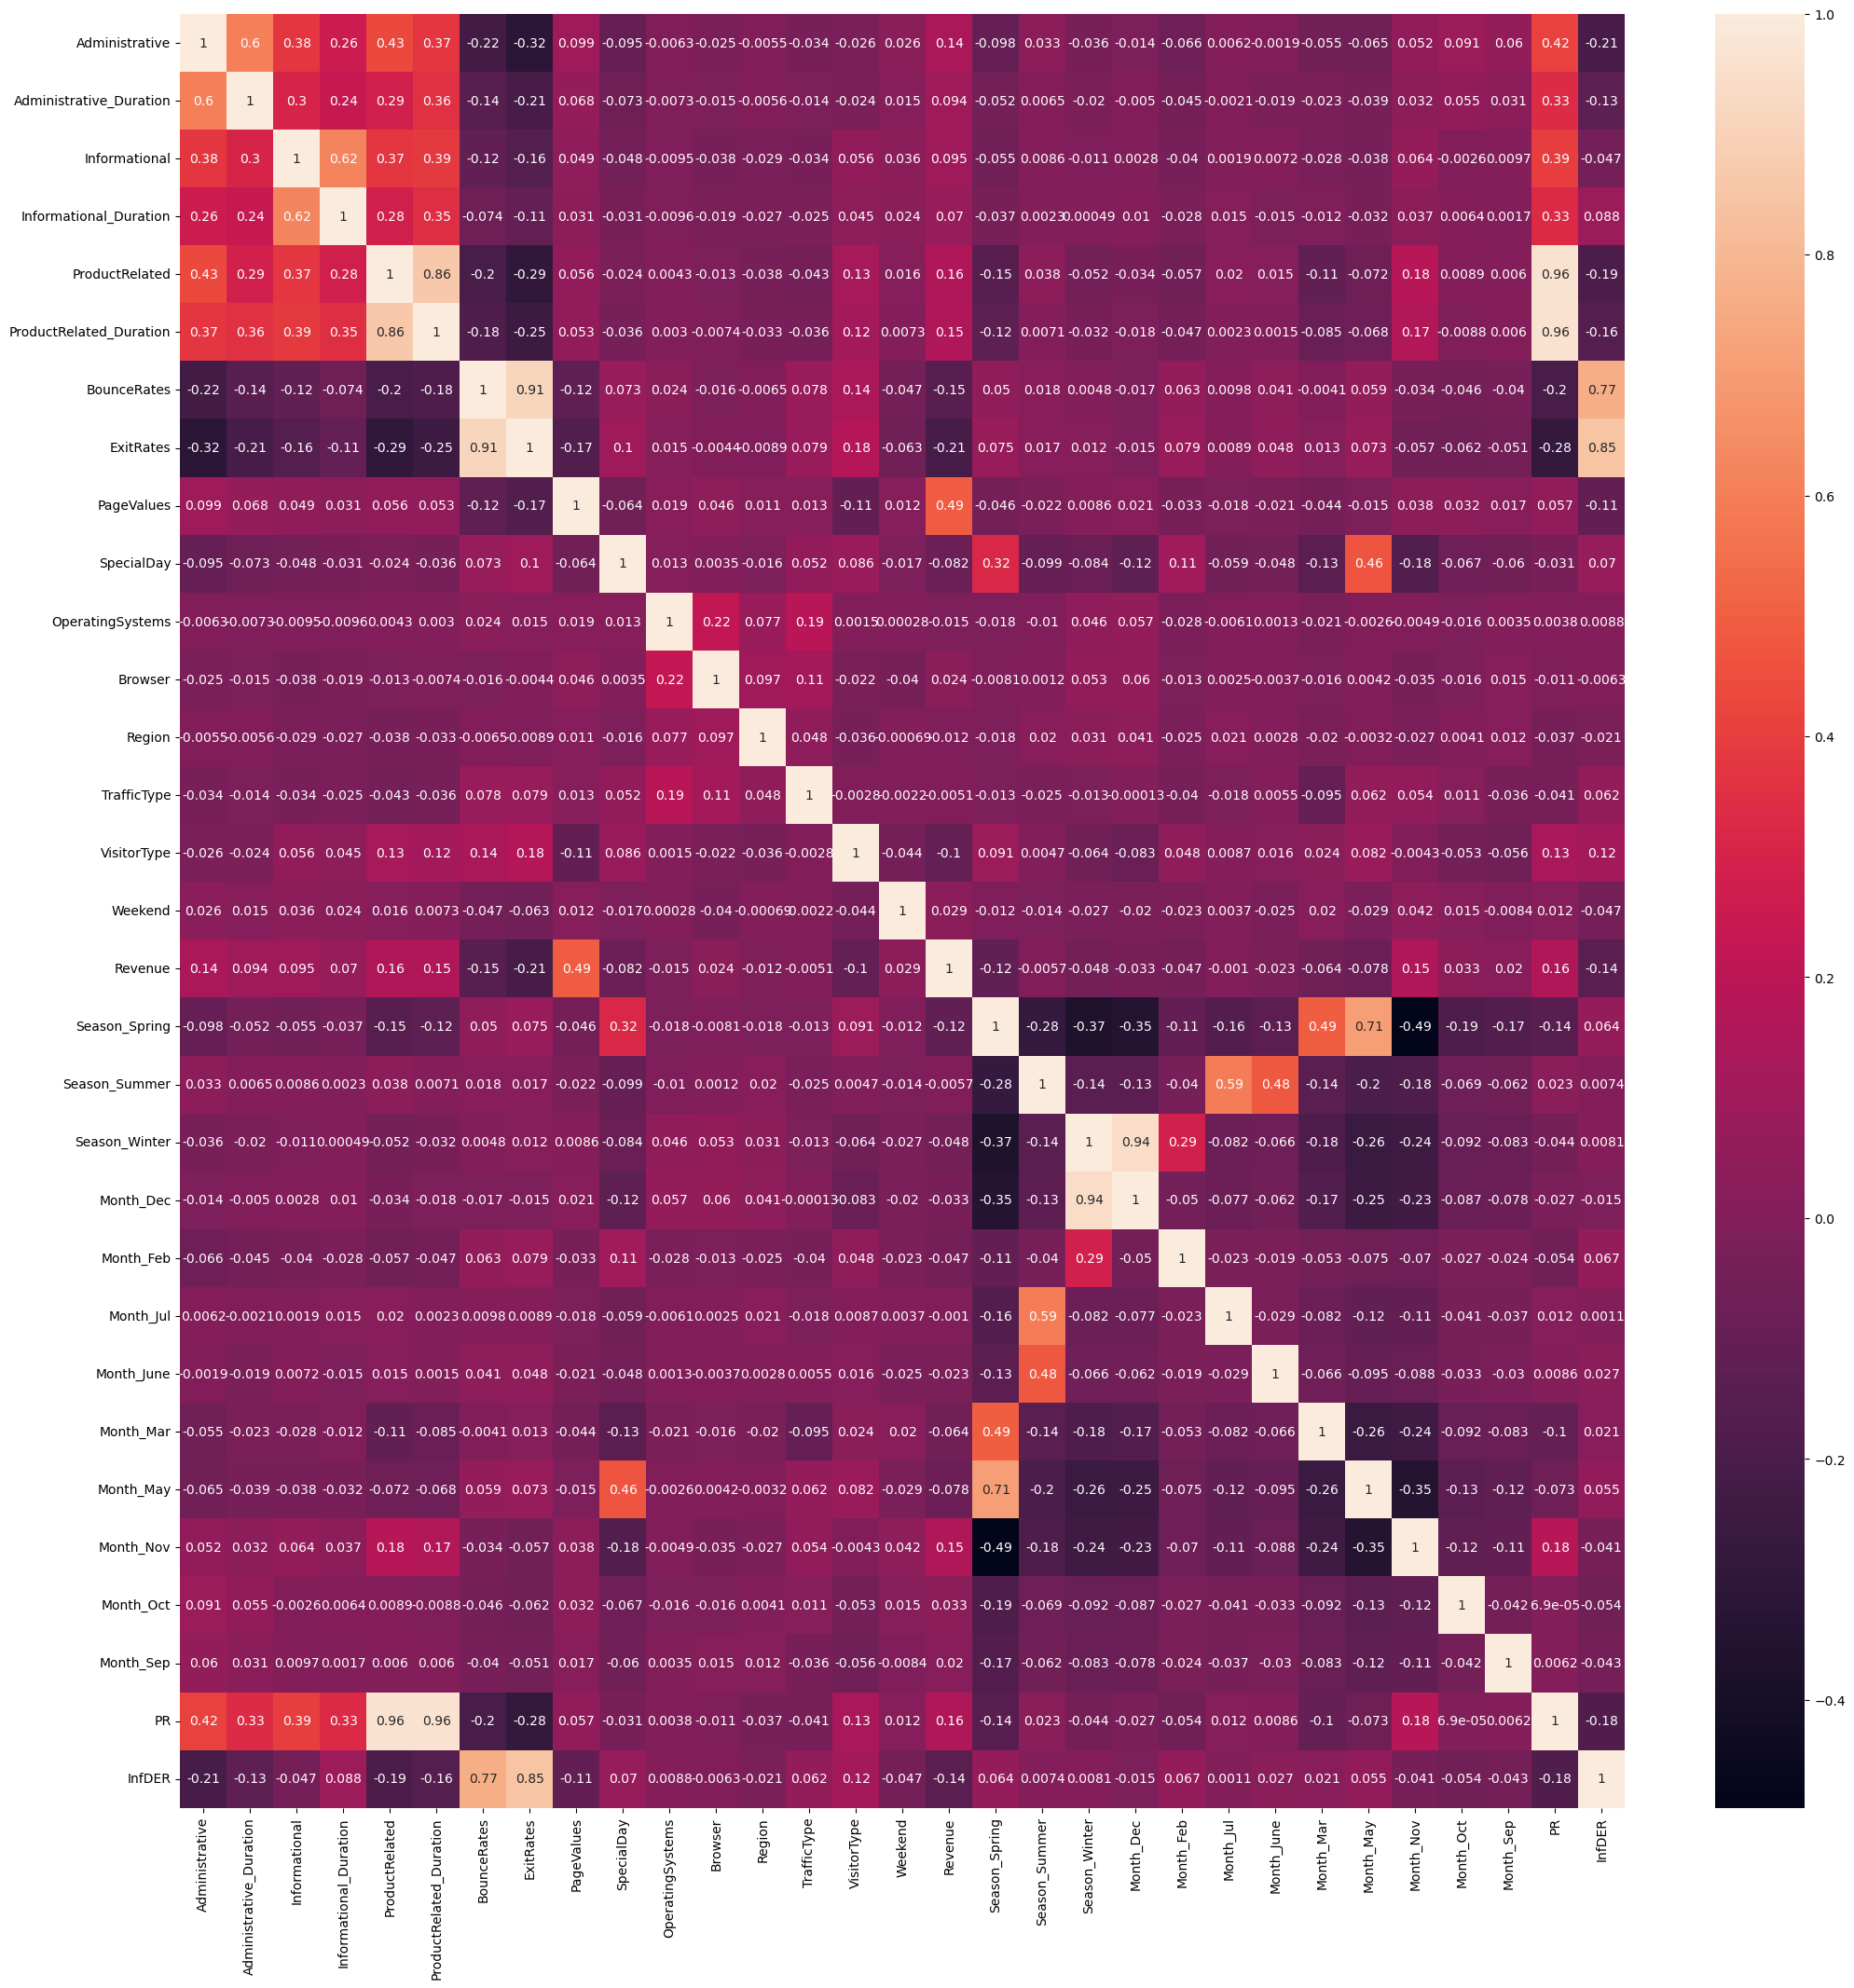

In [59]:
plt.figure(figsize=(25, 25))
sns.heatmap(df.corr(), annot=True)

In [60]:
abs(df.corr()['Revenue']).sort_values()

Month_Jul                  0.001036
TrafficType                0.005113
Season_Summer              0.005715
Region                     0.011595
OperatingSystems           0.014668
Month_Sep                  0.019983
Month_June                 0.023112
Browser                    0.023984
Weekend                    0.029295
Month_Oct                  0.032666
Month_Dec                  0.033112
Month_Feb                  0.047114
Season_Winter              0.047538
Month_Mar                  0.063941
Informational_Duration     0.070345
Month_May                  0.078320
SpecialDay                 0.082305
Administrative_Duration    0.093587
Informational              0.095200
VisitorType                0.104726
Season_Spring              0.117248
Administrative             0.138917
InfDER                     0.139892
BounceRates                0.150673
ProductRelated_Duration    0.152373
Month_Nov                  0.154774
ProductRelated             0.158538
PR                         0

In [61]:
selected_features = ['PageValues', 'ExitRates', 'PR', 'Month_Nov', 'Administrative', 'VisitorType', 'Informational', 'SpecialDay', 'Month_Mar', 'Season_Winter', 'Month_Feb', 'Month_Oct', 'Weekend', 'Browser', 'Month_June', 'Month_Sep', 'OperatingSystems', 'Region', 'Season_Summer', 'TrafficType']

<h4>Checking correlation map of selected features and target column</h4>

<Axes: >

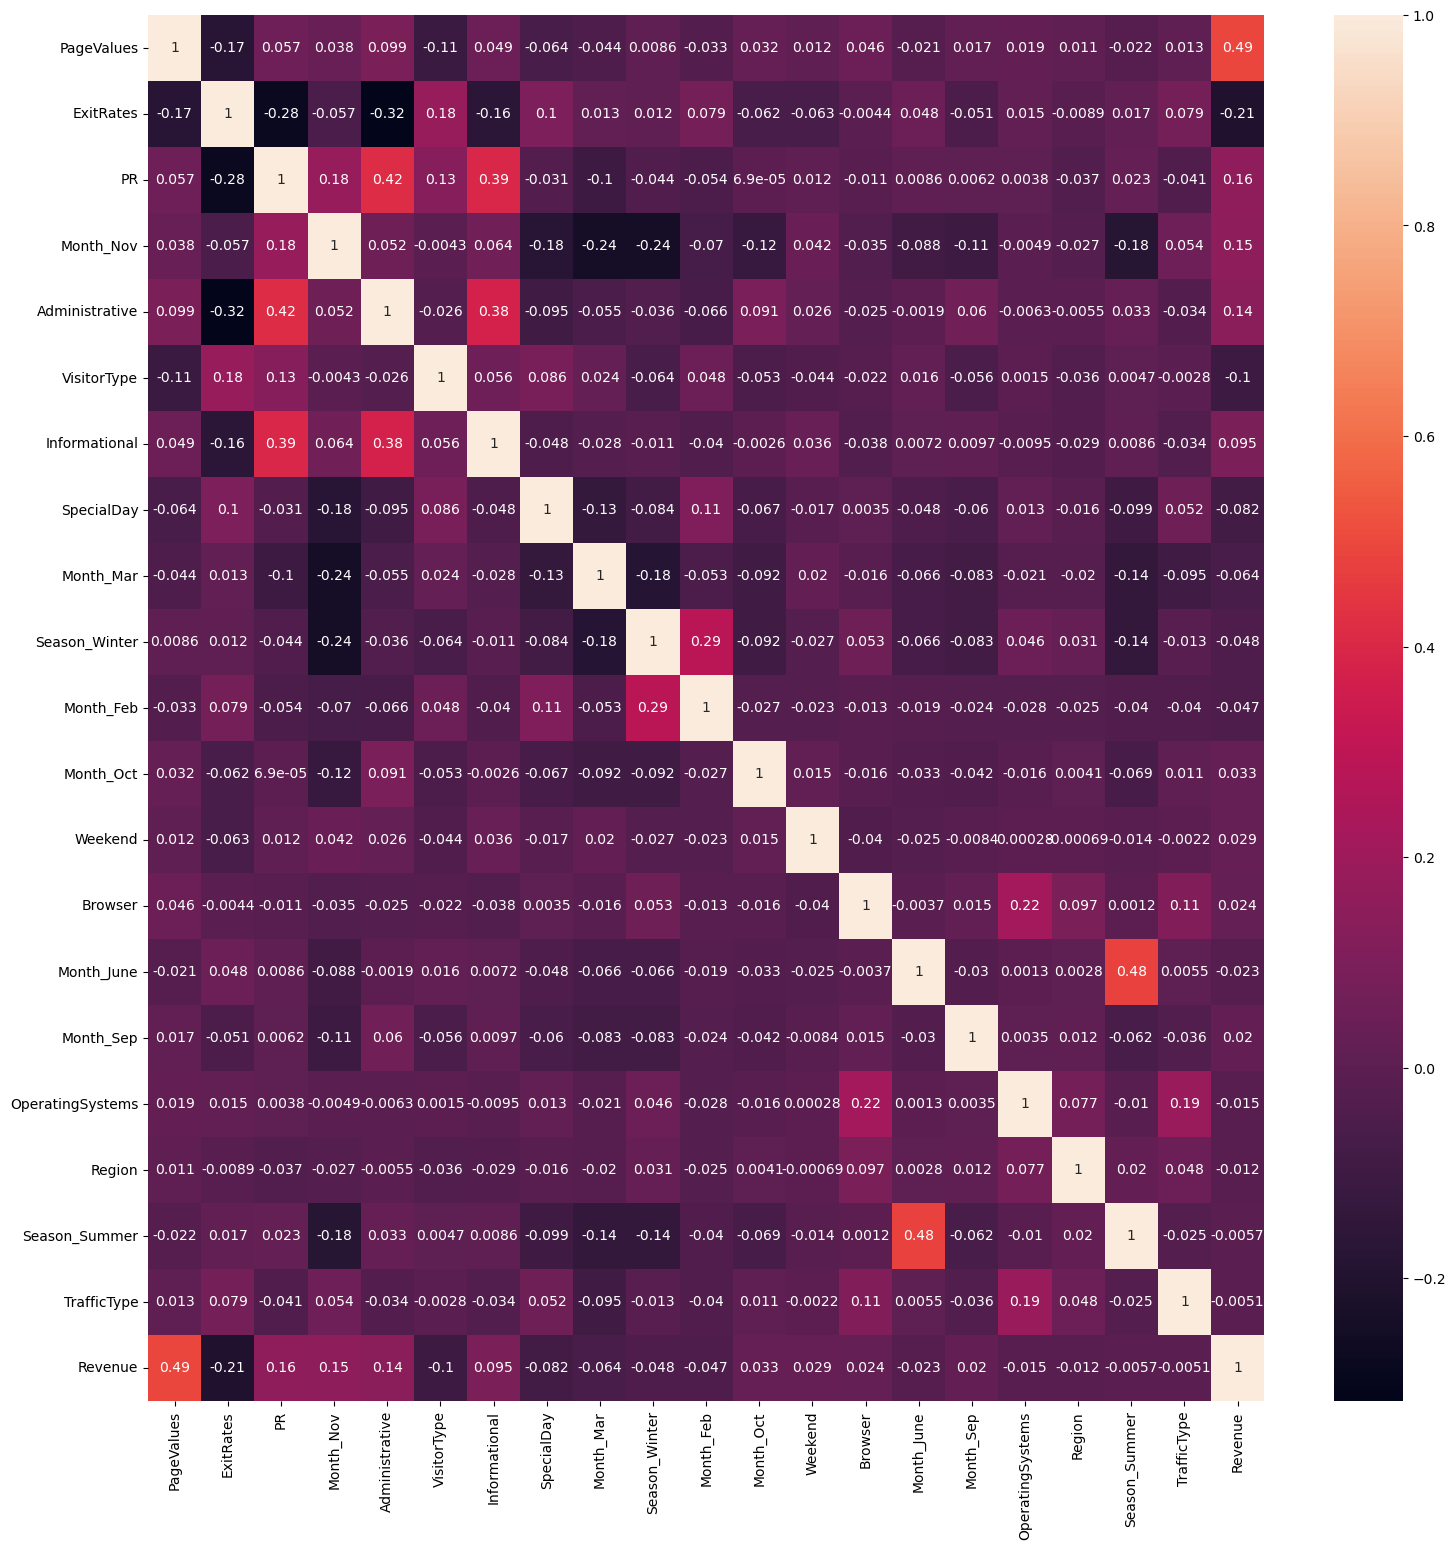

In [62]:
plt.figure(figsize = (18, 18))
sns.heatmap(df[selected_features + ['Revenue']].corr(), annot = True)

<h4>Target column exploration</h4>

<Axes: xlabel='Revenue', ylabel='count'>

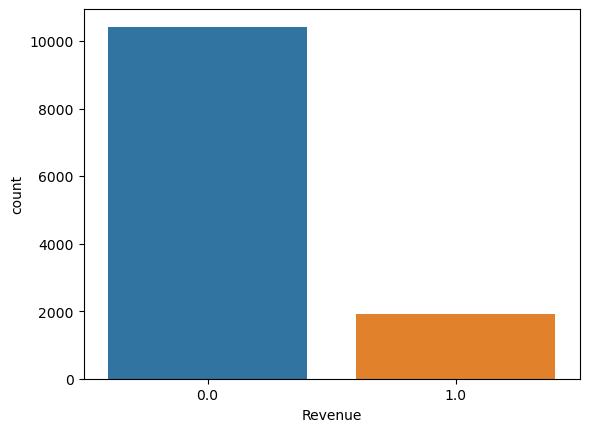

In [63]:
sns.countplot(df, x = 'Revenue')

<h4>Splitting data for train and test set and comparing spliting with and without stratification</h4>

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

<h5>Creating model evaluation function</h5>

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score

<h5>Note</h5>
In context of my task, it's prefered to mispredict customer with no intention to buy. Otherwise making mistake in prediction of customer with intention to purchase will lead to loss of target customer. <br> 
Recall rate is more prioritized. Company will get a few false results, but almost all target customers will be found. 
<h5>Decision</h5>
As recall rate with stratification is better stratifiction will be used

In [66]:
def model_evaluation(models):
    model_list = []
    results_list = []
    
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        cvs = cross_val_score(model, X_test, y_test, cv=3, scoring="recall").mean()
        prec = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        model_list.append(model_name)
        results_list.append([cvs, prec, recall, f1])

    return pd.DataFrame(np.array(results_list), index = model_list, columns='CrossVal precision recall f1'.split())

<h5>Note</h5>
Spliting results firstly will be checked on LogisticRegression

In [67]:
from sklearn.linear_model import LogisticRegression

<h5>Splitting without stratification</h5>

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['Revenue'], random_state = 42, test_size = 0.3)

In [69]:
my_models = model_evaluation({"LR without stratification": LogisticRegression(n_jobs=-1)})
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309    0.76779  0.356522  0.486936

<h5>Splitting with stratification</h5>

In [70]:
split = StratifiedShuffleSplit(n_splits = 1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['Revenue']):
    X_train = df[selected_features].loc[train_index]
    y_train = df['Revenue'].loc[train_index]
    X_test = df[selected_features].loc[test_index]
    y_test = df['Revenue'].loc[test_index]

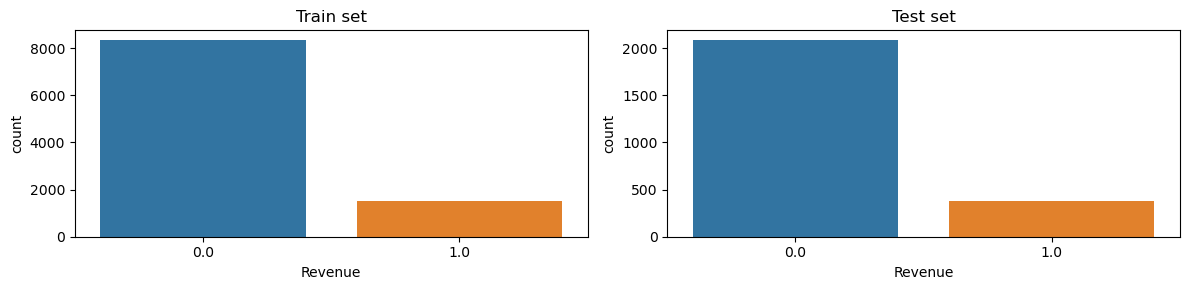

In [71]:
plt.figure(figsize=(12,3))
plt.subplot(121)
sns.countplot(pd.DataFrame(y_train), x = 'Revenue')
plt.title("Train set")
plt.subplot(122)
sns.countplot(pd.DataFrame(y_test), x = 'Revenue')
plt.title("Test set")
plt.tight_layout()

In [72]:
my_models = pd.concat([my_models, model_evaluation({"LR with stratification": LogisticRegression(n_jobs=-1)})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956

<h5>Note</h5>
As results of Cross Validation are higher on not stratified data, stratification will not be used

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], df['Revenue'], random_state = 42, test_size = 0.3)

<h4>PCA</h4>

<h5>Note</h5>
Principal Component Analysis (PCA) is generally not applied directly to categorical features. PCA is a linear transformation technique designed for continuous numerical data. <br>PCA won't be effective with categorical variables since they lack a variance structure

<h4>Logistic Regression with GridSearch</h4>

In [74]:
from sklearn.model_selection import GridSearchCV

In [75]:
lr = LogisticRegression()
params_lr = {'C': range(1, 11), 'max_iter': [1000]}
lr_GS = GridSearchCV(lr, param_grid=params_lr, n_jobs=-1, cv = 3, scoring = 'recall')
lr_GS.fit(X_train, y_train)
lr_GS.best_params_

{'C': 6, 'max_iter': 1000}

In [76]:
my_models = pd.concat([my_models, model_evaluation({"LR with GS": LogisticRegression(**lr_GS.best_params_, n_jobs=-1)})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731

<h4>Polynomial Features</h4>

In [77]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

In [78]:
def order_evaluation(order, name, model): 
    model_list = []
    results_list = []
    for i in range(len(orders)):
        poly_features = PolynomialFeatures(degree=orders[i], include_bias=False)
        X_poly = poly_features.fit_transform(X_train)
        model_ = clone(model)
        model_.fit(X_poly, y_train)
        X_test_poly = poly_features.transform(X_test)
        y_pred = model_.predict(X_test_poly)
        cvs = cross_val_score(model, X_test_poly, y_test, cv=3, scoring="recall").mean()
        prec = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        model_list.append(f"{name} (ord {orders[i]})")
        results_list.append([cvs, prec, recall, f1])
    return pd.DataFrame(np.array(results_list), index = model_list, columns='CrossVal precision recall f1'.split())

<h4>Polynomial Features in Logistic Regression</h4>

In [79]:
orders = [2, 3, 4, 5]
my_models = pd.concat([my_models, order_evaluation(orders, 'LR', LogisticRegression(n_jobs=-1))])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570

<h5>Observation</h5>
Second order polynomial Ligistic Regression Demonstated highest recall rate

<h4>KNeighborsClassifier with GridSearch of parameters</h4>

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
knc = KNeighborsClassifier()
params_knc = {'n_neighbors': range(1, 21)}
knc_GS = GridSearchCV(knc, param_grid=params_knc, n_jobs=-1)
knc_GS.fit(X_train,y_train)
knc_GS.best_params_

{'n_neighbors': 15}

In [82]:
my_models = pd.concat([my_models, model_evaluation({"KNC with GS": KNeighborsClassifier(**knc_GS.best_params_, n_jobs = -1)})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570
KNC with GS                0.212142   0.740385  0.267826  0.393359

<h4>Polynomial Features in KNeighborsClassifier</h4>

In [83]:
my_models = pd.concat([my_models, order_evaluation(orders, 'KNC', KNeighborsClassifier(n_jobs=-1))])

In [84]:
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570
KNC with GS                0.212142   0.740385  0.267826  0.393359
KNC (ord 2)                0.259108   0.665428  0.311304  0.424171
KNC (ord 3)                0.229539   0.655303  0.300870  0.412396
KNC (ord 4)                0.215614   0.653696  0.292174  0.403846
KNC (ord 5)                0.215605   0.687243  0.290435  0.408313

<h4>Support Vector Machine with Grid Search</h4>

In [85]:
from sklearn.svm import SVC

In [86]:
svc = SVC()
param_svc = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf'], 'probability':[True]} 
svc_GS = GridSearchCV(svc, param_grid = param_svc, cv = 3, n_jobs = -1)
svc_GS.fit(X_train, y_train)
svc_GS.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True}

In [87]:
my_models = pd.concat([my_models, model_evaluation({"SVC with GS": SVC(**svc_GS.best_params_)})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570
KNC with GS                0.212142   0.740385  0.267826  0.393359
KNC (ord 2)                0.259108   0.665428  0.311304  0.424171
KNC (ord 3)                0.229539   0.655303  0.300870  0.412396
KNC (ord 4)                0.215614   0.653696  0.292174  0.403846
KNC (ord 5)                0.215605   0.687243  0.290435  0.408313
SVC with GS                0.432992   0.723464  0.450435  0.555198

<h5>Observation</h5>
SVC demonstated good results, but still the highest is by second order Logistic regression 

<h4>Decision tree with Grid Search</h4>

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [89]:
dtc = DecisionTreeClassifier()
params_dtc = {'min_samples_leaf': range(1,5), 'max_depth': np.arange(3, 18, 2)}
dtc_GS = GridSearchCV(dtc, param_grid = params_dtc, n_jobs = -1, cv = 3)
dtc_GS.fit(X_train, y_train)
dtc_GS.best_params_

{'max_depth': 5, 'min_samples_leaf': 3}

In [90]:
my_models = pd.concat([my_models, model_evaluation({"DTC with GS": DecisionTreeClassifier(**dtc_GS.best_params_)})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570
KNC with GS                0.212142   0.740385  0.267826  0.393359
KNC (ord 2)                0.259108   0.665428  0.311304  0.424171
KNC (ord 3)                0.229539   0.655303  0.300870  0.412396
KNC (ord 4)                0.215614   0.653696  0.292174  0.403846
KNC (ord 5)                0.215605   0.687243  0.290435  0.408313
SVC with GS                0.432992   0.723464  0.450435  0.555198
DTC with GS                0.551229   0.669231  0.605217  0.635616

<h5>Observation</h5>
Decision Tree Classifier demonstrated significant increase in recall rate

<h4>Random Forest with Grid Search</h4>

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc = RandomForestClassifier()
params_rfc = {'min_samples_leaf': range(1, 5), 'max_depth': np.arange(10, 100, 10)}
rfc_GS = GridSearchCV(rfc, param_grid = params_rfc, n_jobs = -1, cv =3)
rfc_GS.fit(X_train, y_train)
rfc_GS.best_params_

{'max_depth': 80, 'min_samples_leaf': 2}

In [93]:
my_models = pd.concat([my_models, model_evaluation({"RFC with GS": RandomForestClassifier(**rfc_GS.best_params_)})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570
KNC with GS                0.212142   0.740385  0.267826  0.393359
KNC (ord 2)                0.259108   0.665428  0.311304  0.424171
KNC (ord 3)                0.229539   0.655303  0.300870  0.412396
KNC (ord 4)                0.215614   0.653696  0.292174  0.403846
KNC (ord 5)                0.215605   0.687243  0.290435  0.408313
SVC with GS                0.432992   0.723464  0.450435  0.555198
DTC with GS                0.551229   0.669231  0.605217  0.635616
RFC with GS                0.551274   0.704348  0.563478  0.626087

<h4>Ensemble Learning</h4>
<h4>Hard Voiting</h4>

In [94]:
from sklearn.ensemble import VotingClassifier

<h5>Note</h5>
In Ensemble learning top high recall rate classifiers(Decision Tree, RandomForest, Support Vector) will be used

<Axes: >

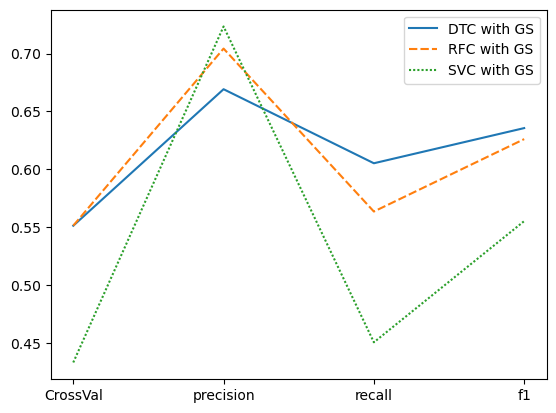

In [95]:
sns.lineplot(my_models.loc[['DTC with GS', 'RFC with GS', 'SVC with GS']].T)

In [96]:
dtc_clf = DecisionTreeClassifier(**dtc_GS.best_params_)
rfc_clf = RandomForestClassifier(**rfc_GS.best_params_)
svc_clf = SVC(**svc_GS.best_params_)

In [97]:
my_models = pd.concat([my_models, model_evaluation({"Hard Voting": VotingClassifier(estimators = [('dtc', dtc_clf), ('rfc', rfc_clf), ('svc', svc_clf)], voting = 'hard')})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570
KNC with GS                0.212142   0.740385  0.267826  0.393359
KNC (ord 2)                0.259108   0.665428  0.311304  0.424171
KNC (ord 3)                0.229539   0.655303  0.300870  0.412396
KNC (ord 4)                0.215614   0.653696  0.292174  0.403846
KNC (ord 5)                0.215605   0.687243  0.290435  0.408313
SVC with GS                0.432992   0.723464  0.450435  0.555198
DTC with GS                0.551229   0.669231  0.605217  0.635616
RFC with GS                0.551274   0.704348  0.563478  0.626087
Hard Voting                0.537322   0.705882  0.563478  0.626692

<h4>Soft Voting</h4>

In [98]:
dtc_clf = DecisionTreeClassifier(**dtc_GS.best_params_)
rfc_clf = RandomForestClassifier(**rfc_GS.best_params_)
svc_clf = SVC(**svc_GS.best_params_)

In [99]:
my_models = pd.concat([my_models, model_evaluation({"Soft Voting": VotingClassifier(estimators = [('dtc', dtc_clf), ('rfc', rfc_clf), ('svc', svc_clf)], voting = 'soft')})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570
KNC with GS                0.212142   0.740385  0.267826  0.393359
KNC (ord 2)                0.259108   0.665428  0.311304  0.424171
KNC (ord 3)                0.229539   0.655303  0.300870  0.412396
KNC (ord 4)                0.215614   0.653696  0.292174  0.403846
KNC (ord 5)                0.215605   0.687243  0.290435  0.408313
SVC with GS                0.432992   0.723464  0.450435  0.555198
DTC with GS                0.551229   0.669231  0.605217  0.635616
RFC with GS                0.551274   0.704348  0.563478  0.626087
Hard Voting                0.537322   0.705882  0.563478  0.626692
Soft Voting                0.490365   0.743655  0.509565  0.604747

<h4>AdaBoost Classifier with Grid Search</h4>

In [100]:
from sklearn.ensemble import AdaBoostClassifier

In [101]:
abc = AdaBoostClassifier(DecisionTreeClassifier(**dtc_GS.best_params_), n_estimators = 200, algorithm="SAMME.R", random_state=42)
params_abc = {'learning_rate': np.linspace(0.0001, 1, 20)}
abc_GS = GridSearchCV(abc, param_grid = params_abc, n_jobs = -1, cv=3)
abc_GS.fit(X_train, y_train)
abc_GS.best_params_

{'learning_rate': 0.0001}

In [102]:
my_models = pd.concat([my_models, model_evaluation({"AdaBoost": AdaBoostClassifier(DecisionTreeClassifier(**dtc_GS.best_params_), n_estimators = 200, algorithm="SAMME.R", random_state=42, learning_rate = 0.0001)})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570
KNC with GS                0.212142   0.740385  0.267826  0.393359
KNC (ord 2)                0.259108   0.665428  0.311304  0.424171
KNC (ord 3)                0.229539   0.655303  0.300870  0.412396
KNC (ord 4)                0.215614   0.653696  0.292174  0.403846
KNC (ord 5)                0.215605   0.687243  0.290435  0.408313
SVC with GS                0.432992   0.723464  0.450435  0.555198
DTC with GS                0.551229   0.669231  0.605217  0.635616
RFC with GS                0.551274   0.704348  0.563478  0.626087
Hard Voting                0.537322   0.705882  0.563478  0.626692
Soft Voting                0.490365   0.743655  0.509565  0.604747
AdaBoost                   0.584315   0.702991  0.572174  0.630872

<h4>Bagging Classifier</h4> 

In [103]:
from sklearn.ensemble import BaggingClassifier

In [104]:
my_models = pd.concat([my_models, model_evaluation({"Bagging": BaggingClassifier(DecisionTreeClassifier(**dtc_GS.best_params_), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)})])
my_models

CrossVal  precision    recall        f1
LR without stratification  0.377309   0.767790  0.356522  0.486936
LR with stratification     0.350783   0.748634  0.358639  0.484956
LR with GS                 0.375573   0.768657  0.358261  0.488731
LR (ord 2)                 0.464251   0.740625  0.412174  0.529609
LR (ord 3)                 0.431174   0.770227  0.413913  0.538462
LR (ord 4)                 0.379054   0.769231  0.295652  0.427136
LR (ord 5)                 0.318226   0.735294  0.217391  0.335570
KNC with GS                0.212142   0.740385  0.267826  0.393359
KNC (ord 2)                0.259108   0.665428  0.311304  0.424171
KNC (ord 3)                0.229539   0.655303  0.300870  0.412396
KNC (ord 4)                0.215614   0.653696  0.292174  0.403846
KNC (ord 5)                0.215605   0.687243  0.290435  0.408313
SVC with GS                0.432992   0.723464  0.450435  0.555198
DTC with GS                0.551229   0.669231  0.605217  0.635616
RFC with GS                0.551274   0.704348  0.563478  0.626087
Hard Voting                0.537322   0.705882  0.563478  0.626692
Soft Voting                0.490365   0.743655  0.509565  0.604747
AdaBoost                   0.584315   0.702991  0.572174  0.630872
Bagging                    0.610402   0.688716  0.615652  0.650138

<Axes: >

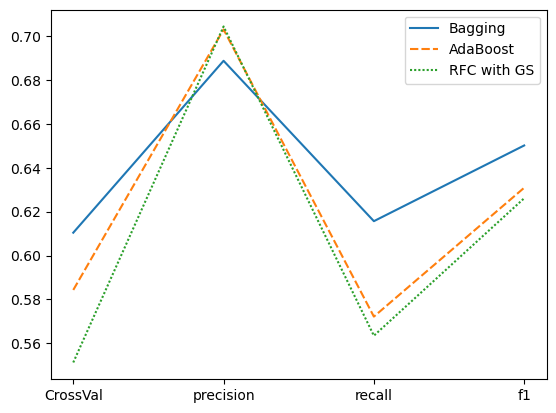

In [105]:
sns.lineplot(my_models.loc[['Bagging', 'AdaBoost', 'RFC with GS']].T)

<h5>Final</h5>
The best performance was demonstrated by Bagging Classifier 